In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_style("darkgrid")


%matplotlib inline

In [2]:
df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
# delete needless columns
df = df.drop(['Events', 'Date'], axis = 1)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                    1319 non-null object
WindGustMPH                  

In [5]:
'''most of the columns have categorical data when it should be numeric. 
Change the object colums to numeric'''
df = df.replace('-',0)
df = df.replace('T',0)

df = df.astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
TempHighF                     1319 non-null float64
TempAvgF                      1319 non-null float64
TempLowF                      1319 non-null float64
DewPointHighF                 1319 non-null float64
DewPointAvgF                  1319 non-null float64
DewPointLowF                  1319 non-null float64
HumidityHighPercent           1319 non-null float64
HumidityAvgPercent            1319 non-null float64
HumidityLowPercent            1319 non-null float64
SeaLevelPressureHighInches    1319 non-null float64
SeaLevelPressureAvgInches     1319 non-null float64
SeaLevelPressureLowInches     1319 non-null float64
VisibilityHighMiles           1319 non-null float64
VisibilityAvgMiles            1319 non-null float64
VisibilityLowMiles            1319 non-null float64
WindHighMPH                   1319 non-null float64
WindAvgMPH                    1319 non-null float64
WindGustM

# Training and Testing Model

In [7]:
X = df.drop(['PrecipitationSumInches'],axis=1)
y = df.PrecipitationSumInches

# split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
Lr = LinearRegression().fit(X_train, y_train)

In [9]:
pred = Lr.predict(X_test)

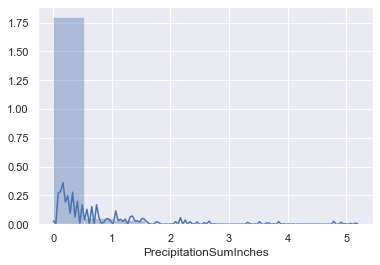

In [10]:
sns.distplot(df["PrecipitationSumInches"], bins=10)

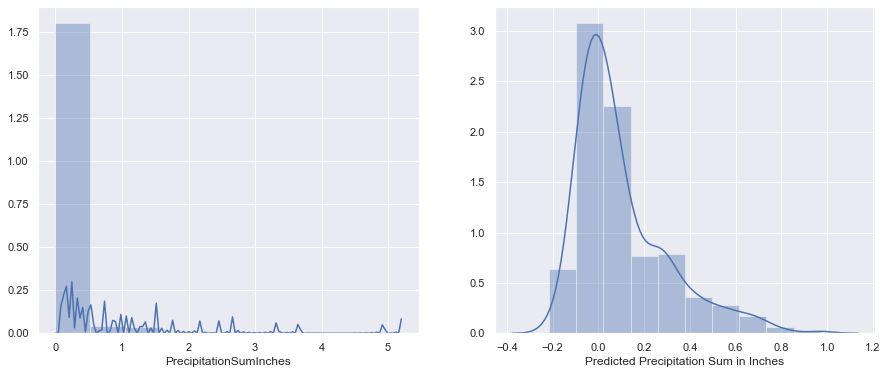

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15, 6))
sns.distplot(y_test, bins=10, ax = axes[0])
sns.distplot(pred, bins=10, ax = axes[1],axlabel = 'Predicted Precipitation Sum in Inches')

In [12]:
from sklearn.metrics import mean_absolute_error
err = mean_absolute_error(pred, y_test)
err

0.17098948183797727

In conclusion based on the histogram and the mean absolute error it suggests most rainfall is between zero and 1 inches
therefore the model was able to predict rainfall accurately. Rainfall between 2-5 inches within within years 2013-2017 where very rare occurances.